<a href="https://colab.research.google.com/github/j-mayo/CNN-Practice/blob/main/%E3%84%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
from PIL import Image

c = glob.glob('/content/drive/MyDrive/images/2/*') # sample_data에 사진 붙여넣기
cocktails = []
for f in c:
    cocktails.append(np.asarray(Image.open(f)))  # 이미지 넘파이로 변환할 때 asarray!

In [ ]:
n_cocktails = np.array(cocktails)

In [ ]:
n_cocktails.reshape(-1, 64, 64, 3)
n_cocktails.shape

(319, 64, 64, 3)

In [ ]:
p = glob.glob('/content/drive/MyDrive/images/3/*')
pizzas = []
for f in p:
  pizzas.append(np.asarray(Image.open(f)))

n_pizzas = np.array(pizzas)
n_pizzas.reshape(-1, 64, 64, 3)
n_pizzas.shape

(207, 64, 64, 3)

In [ ]:
"""
import os
import glob
from PIL import Image

files = glob.glob('/content/drive/MyDrive/images/4(hamburger)/*') # 절대경로 입력

for f in files:
    try:
        img = Image.open(f)
        img_resize = img.resize((64, 64))
        title, ext = os.path.splitext(f)
        img_resize.save(title + '_resize64__' + ext)
        os.unlink(f)
    except OSError:
        print(title)
        os.unlink(f)
        pass
"""

# 사진 사이즈 바꿔주는거...

"\nimport os\nimport glob\nfrom PIL import Image\n\nfiles = glob.glob('/content/drive/MyDrive/images/4(hamburger)/*') # 절대경로 입력\n\nfor f in files:\n    try:\n        img = Image.open(f)\n        img_resize = img.resize((64, 64))\n        title, ext = os.path.splitext(f)\n        img_resize.save(title + '_resize64__' + ext)\n        os.unlink(f)\n    except OSError:\n        print(title)\n        os.unlink(f)\n        pass\n"

In [ ]:
import os
import glob
from PIL import Image
files = glob.glob('/content/sample_data/d/*')

pred = []
for f in files:
    try:
      img = Image.open(f)
      img_resize = img.resize((64, 64))
      pred.append(np.asarray(img_resize))
      os.unlink(f)
    except OSError:
      print(1)
      
      pass
n_pred = np.array(pred)
n_pred.reshape(-1, 64, 64, 3)
n_pred.shape

(5, 64, 64, 3)

In [ ]:
h = glob.glob('/content/drive/MyDrive/images/4(hamburger)/*')
hamburgers = []
for f in h:
  hamburgers.append(np.asarray(Image.open(f)))

n_hamburgers = np.array(hamburgers)
n_hamburgers.reshape(-1, 64, 64, 3)
n_hamburgers.shape

(242, 64, 64, 3)

In [ ]:
target = np.array([0] * 319 + [1] * 207 + [2] * 242)
input = np.array(cocktails + pizzas + hamburgers) / 255.0  # 0~1로 맞추기
input.reshape(-1, 64, 64, 3)
input.shape

(768, 64, 64, 3)

In [ ]:
# 합성곱 신경망 사용한 이미지 분류
from tensorflow import keras
from sklearn.model_selection import train_test_split\
# 데이터 나누기
t_input, test_input, t_target, test_target = train_test_split(input, target, test_size=0.2, random_state=9)
train_input, val_input, train_target, val_target = train_test_split(t_input, t_target, test_size=0.2)
print(train_input.shape, test_input.shape, val_input.shape)

(491, 64, 64, 3) (154, 64, 64, 3) (123, 64, 64, 3)


In [ ]:
# 합성곱 신경망 만들기
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=5, activation='relu', padding='same', input_shape=(64,64,3)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=5, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(150, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 64, 64, 32)        2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 150)               2457750   
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)              

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_input, train_target, epochs=20, validation_data=(val_input, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
16/16 [==============================] - 7s 411ms/step - loss: 1.2836 - accuracy: 0.3931 - val_loss: 1.0045 - val_accuracy: 0.3902
Epoch 2/20
16/16 [==============================] - 6s 398ms/step - loss: 0.8666 - accuracy: 0.5234 - val_loss: 0.8912 - val_accuracy: 0.5691
Epoch 3/20
16/16 [==============================] - 6s 397ms/step - loss: 0.7979 - accuracy: 0.6314 - val_loss: 0.9594 - val_accuracy: 0.5041
Epoch 4/20
16/16 [==============================] - 6s 399ms/step - loss: 0.7133 - accuracy: 0.6599 - val_loss: 0.7676 - val_accuracy: 0.6341
Epoch 5/20
16/16 [==============================] - 6s 399ms/step - loss: 0.6148 - accuracy: 0.7128 - val_loss: 0.7583 - val_accuracy: 0.6585
Epoch 6/20
16/16 [==============================] - 6s 402ms/step - loss: 0.5721 - accuracy: 0.7536 - val_loss: 0.7457 - val_accuracy: 0.6585
Epoch 7/20
16/16 [==============================] - 6s 402ms/step - loss: 0.4786 - accuracy: 0.8330 - val_loss: 0.8246 - val_accuracy: 0.6748
Epoch 

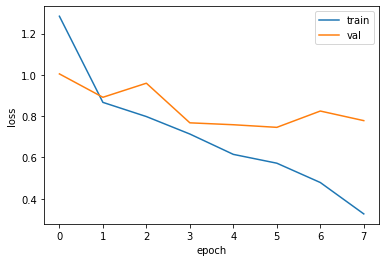

In [ ]:
# 손실 그래프를 그려보자
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# 모델을 평가해 보자
model.evaluate(val_input, val_target)

4/4 [==============================] - 0s 103ms/step - loss: 0.7457 - accuracy: 0.6585


[0.7456749677658081, 0.6585366129875183]

In [ ]:
model.evaluate(test_input, test_target)

5/5 [==============================] - 1s 103ms/step - loss: 0.6300 - accuracy: 0.7403


[0.6300199627876282, 0.7402597665786743]

In [ ]:
model.load_weights('best-cnn-model_0611_83.5_79.6_83.1.h5')

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


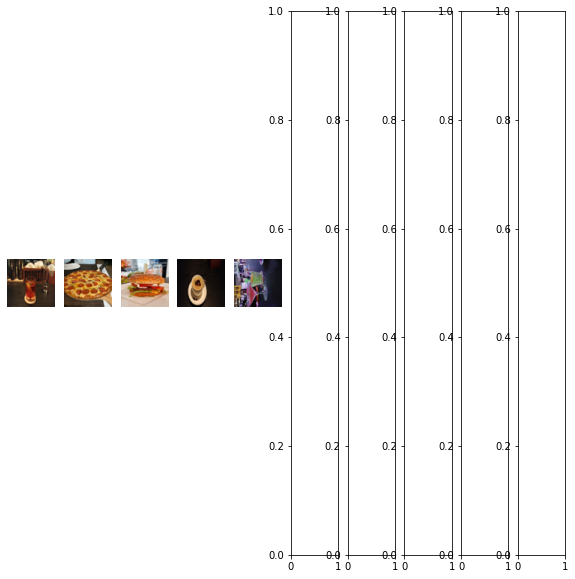

In [ ]:
print(model.predict(n_pred[0:5]))
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(5):
  axs[i].imshow(n_pred[i].reshape(64, 64, 3), cmap='gray_r')
  axs[i].axis('off')
#dh